 # Time series prediction
 
 Predict kWh 48 hours ahead of current time.
 
 In this data reading of meter is bi-hourly. We have to get houly reading in predictions. 
 
 For optimization, our prediction shold not be deviated more than ±5kWh.

In [57]:
import numpy as np
import matplotlib as plt
import pandas as pd
%matplotlib inline
from matplotlib import rcParams
#rcPramas['figure.figsize'] = 10, 6

In [3]:
dataset = pd.read_csv("3098000032-Mar18-Mar19.csv")

In [63]:
dataset

,serial,kWh,kW,kVARh,kVAR,Time_stamp
0,3098000032,10.854,0.000,7.814,0.002,2018-03-01 15:30:00
1,3098000032,10.750,0.000,7.813,0.000,2018-03-01 14:30:00
2,3098000032,12.325,0.086,8.302,0.076,2018-03-05 09:00:00
3,3098000032,12.372,0.094,8.345,0.086,2018-03-05 09:30:00
4,3098000032,12.415,0.086,8.386,0.082,2018-03-05 10:00:00
...,...,...,...,...,...,...
17457,3098000032,6781.400,0.982,1721.240,0.406,2019-03-31 22:00:00
17458,3098000032,6781.920,1.040,1721.320,0.460,2019-03-31 22:30:00
17459,3098000032,6782.520,1.192,1721.390,0.498,2019-03-31 23:00:00
17460,3098000032,6783.120,0.000,1721.470,0.436,2019-03-31 23:30:00


In [7]:
dataset.shape

(17462, 6)

In [26]:
dataset.dtypes

serial                 int64
kWh                  float64
kW                   float64
kVARh                float64
kVAR                 float64
Time_stamp    datetime64[ns]
dtype: object

In [61]:
#For checking missing values in dataset
dataset.isna().sum()

serial        0
kWh           0
kW            0
kVARh         0
kVAR          0
Time_stamp    0
dtype: int64

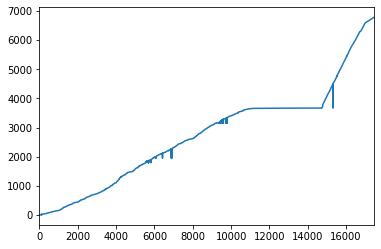

In [18]:
dataset.kWh.plot()

In [23]:
df['Time'] = pd.to_datetime(dataset.Time_stamp)

In [28]:
dataset['Time_stamp'] = pd.to_datetime(dataset['Time_stamp'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Time_stamp'])
df = pd.DataFrame(dataset, columns=['kWh', 'Time_stamp'])

In [48]:
#Number of time_stamp per month
df.Time_stamp.dt.month.value_counts()

3     2759
8     1462
5     1452
12    1440
4     1429
9     1427
11    1421
7     1413
10    1257
2     1239
6     1232
1      931
Name: Time_stamp, dtype: int64

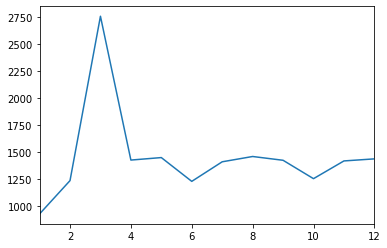

In [52]:
#Line plot of Number of time_stamp per month
df.Time_stamp.dt.month.value_counts().sort_index().plot()

In [56]:
df.Time_stamp.max()
df.Time_stamp.min()

Timestamp('2018-03-01 14:30:00')